# Libraries and functions

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from vtk_rw import read_vtk
from plotting import plot_surf_stat_map, crop_img # from https://github.com/juhuntenburg/brainsurfacescripts
import matplotlib as mpl
import cmocean 
from nilearn import plotting

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
def load_pickle(pkl_file):
    pkl_in = open(pkl_file, 'r')
    pkl_dict = pickle.load(pkl_in)
    pkl_in.close()
    return pkl_dict

In [4]:
def brain_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(12,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

In [5]:
def dorsal_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(8,rows*10))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

In [6]:
def occ_fig(plot_list):
    sns.set_style('white')
    n = len(plot_list)
    rows = int(n/2)
    fig = plt.figure(figsize=(6,rows*5))
    for img in range(n):
        ax = fig.add_subplot(rows,2,img+1)
        plt.imshow(plot_list[img])
        ax.set_axis_off()
    fig.tight_layout()
    return fig

In [7]:
colors = sns.color_palette('cubehelix', 20)
pic_folder = '/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new/'

### Meshes for most visualizations

In [8]:
infl=150
lh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_%i.vtk'%infl
lh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/lh_lowres_new_taubin_%i_sulc.npy'%infl
rh_mesh_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_%i.vtk'%infl
rh_sulc_file = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/rh_lowres_new_taubin_%i_sulc.npy'%infl
fullmask_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_new.npy'
vizmaks_file = '/scr/ilz3/myelinconnect/new_groupavg/masks/fullmask_lh_rh_viz.npy'
lh_sulc = np.load(lh_sulc_file)
lv, lf, _ = read_vtk(lh_mesh_file)
rh_sulc = np.load(rh_sulc_file)
rv, rf, _ = read_vtk(rh_mesh_file)
fullmask = np.load(fullmask_file)
vizmask = np.load(vizmaks_file)
figsize_left = (10,9)
figsize_right = (10,7.3)
figsize_dorsal = (10,10)
darkness=0.6

# Figure 1

### Less inflated surface

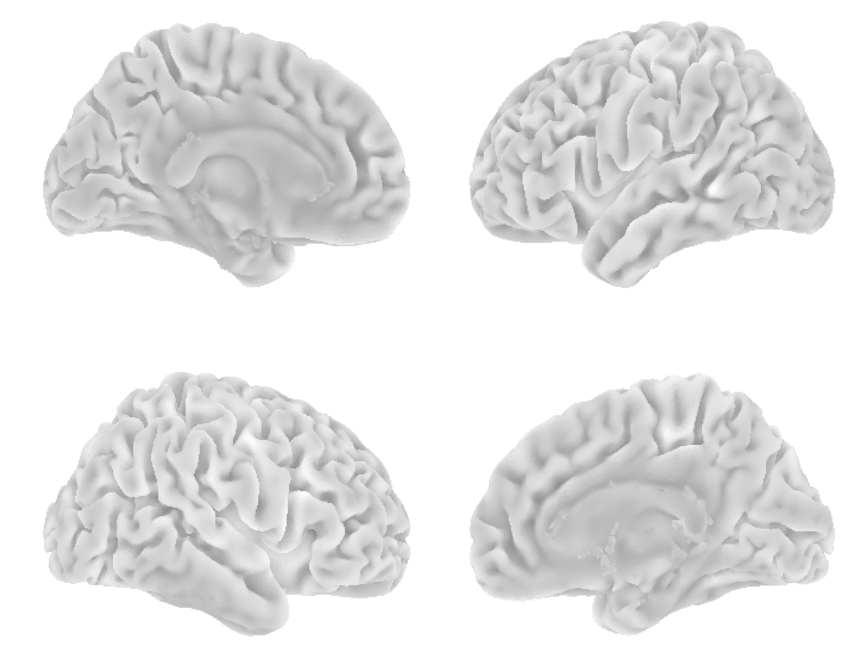

In [9]:
mesh_dir = '/scr/ilz3/myelinconnect/new_groupavg/surfs/lowres/inflated/'
infl=10
cropped_img = []
rh_sulc_infl=np.load(mesh_dir+'rh_lowres_new_taubin_%i_sulc.npy'%infl)
rv_infl, rf_infl, _ = read_vtk(mesh_dir+'rh_lowres_new_taubin_%i.vtk'%infl)
lh_sulc_infl = np.load(mesh_dir+'lh_lowres_new_taubin_%i_sulc.npy'%infl)
lv_infl, lf_infl, ld_infl = read_vtk(mesh_dir+'lh_lowres_new_taubin_%i.vtk'%infl)

sns.set_style('white')
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv_infl, lf_infl, bg_map=lh_sulc_infl, bg_on_stat=True,
                            darkness=0.5, elev=elev,azim=azim, figsize=(10,8.5),threshold=1e-50)
    cropped_img.append(crop_img(plot))
    
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv_infl, rf_infl, bg_map=rh_sulc_infl, bg_on_stat=True,
                            darkness=0.5, elev=elev,azim=azim, figsize=(10,10),threshold=1e-50)
    cropped_img.append(crop_img(plot))
    
fig=brain_fig(cropped_img)
#fig.savefig(pic_folder+'group_surf_raw.png')

### T1 profile

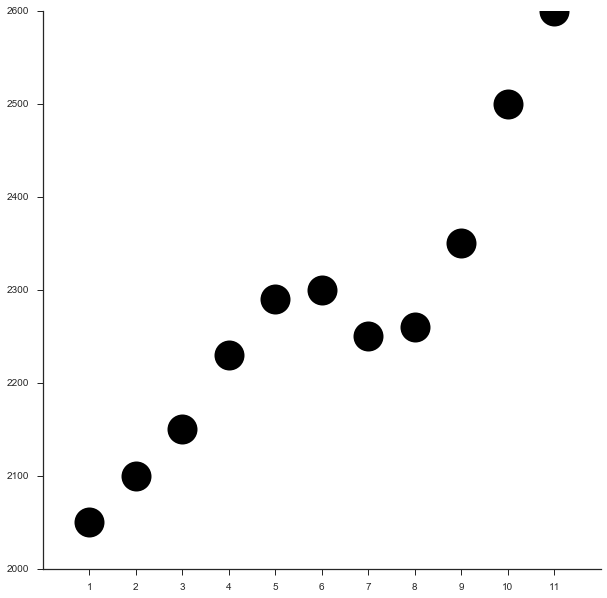

In [18]:
x = np.arange(1,12)
t1_profile = (2050, 2100, 2150, 2230, 2290, 2300, 2250, 2260, 2350, 2500, 2600)
sns.set_style('ticks')
fig = plt.figure(figsize=(10, 10))
plt.plot(x, t1_profile, linewidth=0, marker='o', color='black', markersize=30)
plt.xticks(x)
sns.despine()
sns.set()
#fig.savefig(pic_folder+'profile.svg')

### Time series

In [11]:
import nibabel as nb
rs = nb.load('/scr/ilz2/myelinconnect/resting/final/BP4T_rest1_1_denoised.nii.gz')
rs = rs.get_data()

([], <a list of 0 Text yticklabel objects>)

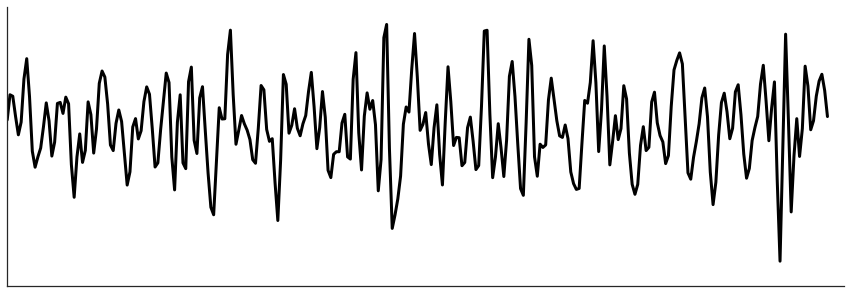

In [13]:
sns.set_style('white')
fig= plt.figure(figsize=(15,5))
plt.plot(rs[60,60,35], color='black', linewidth=3)
sns.despine()
plt.xticks([])
plt.yticks([])
#fig.savefig(pic_folder+'timeseries.svg')

# Figure 2

In [19]:
fc_dist = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/fc_dist_corr.npy')
fc_t1 = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/fc_t1_corr.npy')
t1_dist = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/dist_t1_corr.npy')
resid_corr = np.load('/scr/ilz3/myelinconnect/new_groupavg/corr/t1resid_fcresid_corr.npy')

In [20]:
fc_dist[vizmask] = 0
fc_t1[vizmask] = 0
t1_dist[vizmask] = 0
resid_corr[vizmask] = 0

In [21]:
sns.set_context(None)
cropped_img = []
vmin=-0.65
vmax=0
sns.set_style('white')
data = fc_t1
#cmap=cmocean.cm.amp_r
cmap=cmocean.cm.ice
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

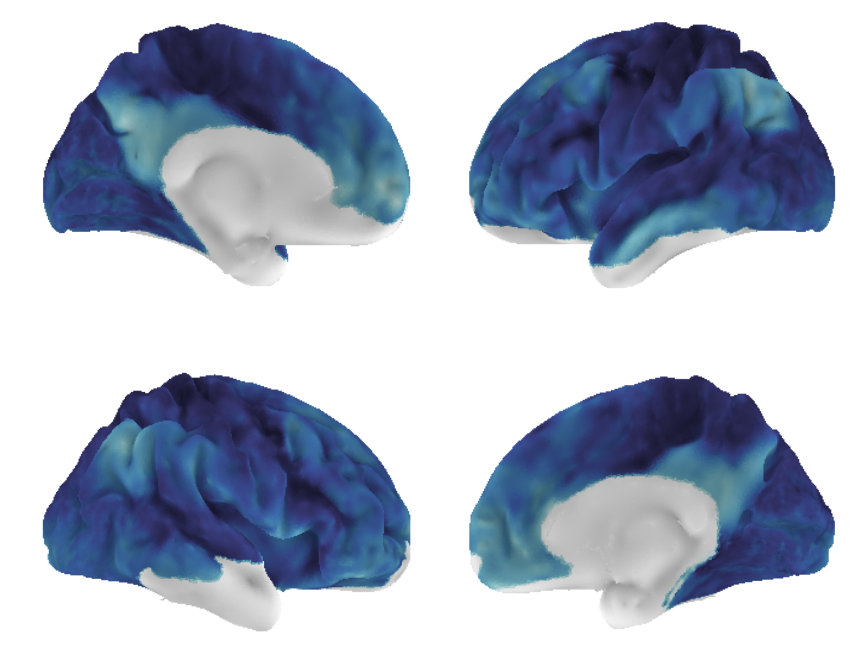

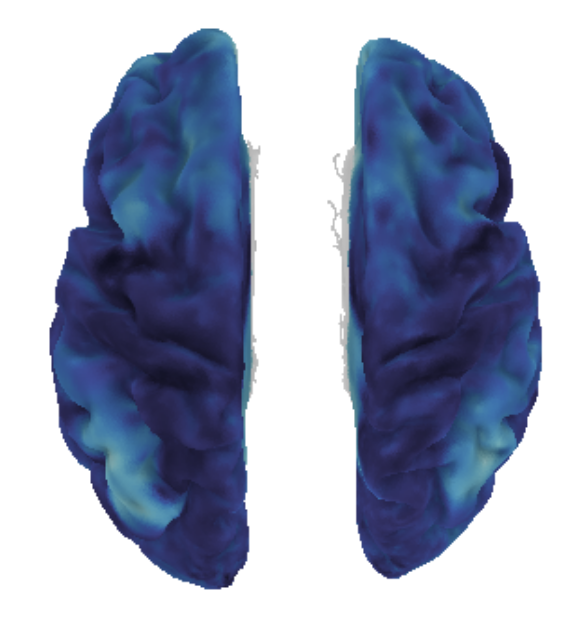

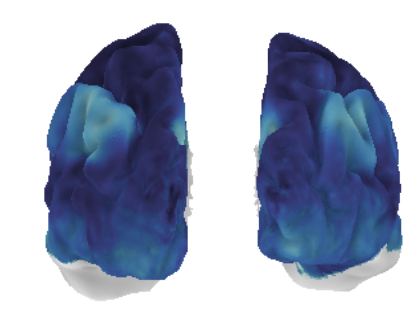

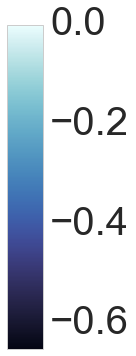

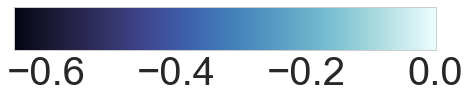

In [22]:
fig=brain_fig(cropped_img[0:4])
#fig.savefig(pic_folder+'raw_correlations_lat_med_blue.png')

fig = dorsal_fig(cropped_img[4:6])
#fig.savefig(pic_folder+'raw_correlations_dorsal_blue.png')

fig = occ_fig(cropped_img[6:8])
#fig.savefig(pic_folder+'raw_correlations_occ_blue.png')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.ice
norm = mpl.colors.Normalize(vmin=-0.65, vmax=0)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-0.6,-0.4,-0.2,0])
#fig.savefig(pic_folder+'raw_correlations_cbar.svg')

fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[-0.6,-0.4,-0.2,0])
#fig.savefig(pic_folder+'raw_correlations_cbar_horizontal.svg')

sns.set()

# Figure 3

### Load and prep embeddings

In [ ]:
embed_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed.npy'
embed_viz_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed_viz.npy'
dict_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed_dict.pkl'
dict_viz_file='/scr/ilz3/myelinconnect/new_groupavg/embed/both_smooth_3_embed_dict_viz.pkl'

In [ ]:
embed_dict = load_pickle(dict_file)
eigenval=embed_dict['lambdas']
perc_var = eigenval/np.sum(eigenval)*100
# normalize vectors
embed_masked = np.zeros((embed_dict['vectors'].shape[0], embed_dict['vectors'].shape[1]-1))
for comp in range(100):
    embed_masked[:,comp]=(embed_dict['vectors'][:,comp+1]/embed_dict['vectors'][:,0])

# unmask the embedding, that has been saved in masked form
idcs=np.arange(0,(lv.shape[0]+rv.shape[0]))
nonmask=np.delete(idcs, fullmask)
embed = np.zeros(((lv.shape[0]+rv.shape[0]),100))
embed[nonmask] = embed_masked

In [ ]:
embed_dict_viz = load_pickle(dict_viz_file)
# normalize vectors
embed_masked_viz = np.zeros((embed_dict_viz['vectors'].shape[0], embed_dict_viz['vectors'].shape[1]-1))
for comp in range(100):
    embed_masked_viz[:,comp]=(embed_dict_viz['vectors'][:,comp+1]/embed_dict_viz['vectors'][:,0])

# unmask the embedding, that has been saved in masked form
idcs_viz=np.arange(0,(lv.shape[0]+rv.shape[0]))
nonmask_viz=np.delete(idcs_viz, vizmask)
embed_viz = np.zeros(((lv.shape[0]+rv.shape[0]),100))
embed_viz[nonmask_viz] = embed_masked_viz

### Load models

In [ ]:
t1_predict_file_0 = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_0.pkl'
t1_predict_file_best = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/both_t1avg_by_fc_maps_best.pkl'
t1_predict_0 = load_pickle(t1_predict_file_0)
t1_predict_best = load_pickle(t1_predict_file_best)

In [ ]:
t1_predict_file_0_viz = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5_viz/both_t1avg_by_fc_maps_0.pkl'
t1_predict_file_best_viz = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5_viz/both_t1avg_by_fc_maps_best.pkl'
t1_predict_0_viz = load_pickle(t1_predict_file_0_viz)
t1_predict_best_viz = load_pickle(t1_predict_file_best_viz)

In [ ]:
sns.set_context(None)
cropped_img = []
vmin=1650
vmax=2300
data = t1_predict_0_viz['t1']
cmap=cmocean.cm.tempo_r
sns.set_style('white')
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

In [ ]:
fig=brain_fig(cropped_img[0:4])
fig.savefig(pic_folder+'myelin_lateral_medial.png')

fig=dorsal_fig(cropped_img[4:6])
fig.savefig(pic_folder+'myelin_dorsal.png')

fig=brain_fig(cropped_img[6:8])
fig.savefig(pic_folder+'myelin_occ.png')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.tempo_r
norm = mpl.colors.Normalize(vmin=1700, vmax=2300)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[1700, 1900, 2100, 2300])
fig.savefig(pic_folder+'myelin_cbar.svg')
fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[1700, 1900, 2100, 2300])
fig.savefig(pic_folder+'myelin_cbar_horizontal.svg')
sns.set()

In [ ]:
sns.set_context(None)
cropped_imgb = []
vmin=-2.3
vmax=2.5
data = embed_viz[:,0]
cmap=cmocean.cm.tempo_r
sns.set_style('white')
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_imgb.append(crop_img(plot))

In [ ]:
fig = brain_fig(cropped_imgb[0:4])
fig.savefig(pic_folder+'embed_lateral_medial.png')

fig = dorsal_fig(cropped_imgb[4:6])
fig.savefig(pic_folder+'embed_dorsal.png')

fig = brain_fig(cropped_imgb[6:8])
fig.savefig(pic_folder+'embed_occ.png')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.tempo_r
norm = mpl.colors.Normalize(vmin=-2.3, vmax=2.5)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-2, -1, 0, 1, 2])
fig.savefig(pic_folder+'embed_cbar.svg')
fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[-2, -1, 0, 1, 2])
fig.savefig(pic_folder+'embed_cbar_horizontal.svg')
sns.set()

In [ ]:
sns.set_style('whitegrid',{'axes.grid': False})
sns.set_context('poster', font_scale=1.5)
scatter_mask = np.where(t1_predict_0['t1']>1500)

xlim = (-2.5, 2.5)
ylim = (1600, 2350)
yticks = [1700, 1900,2100, 2300]
scatter_color = sns.xkcd_rgb['medium grey']
fig = sns.jointplot(-embed[:,0][scatter_mask], 
                    t1_predict_0['t1'][scatter_mask],
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=10, shade=True, shade_lowest=False)
fig.set_axis_labels('FC1', 'T1', fontsize=25)
fig.ax_joint.set_yticks(yticks);
#fig.savefig(pic_folder+'FC1_T1_mediumgrey.png')
sns.set()

# Figure 4

In [ ]:
sns.set_context('poster', font_scale=1.5)
sns.set_style("ticks")
fig=plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(121)
plt.plot(np.arange(1,22),perc_var[:21], color='black')
plt.plot(np.arange(20,100), perc_var[20:], color='black', alpha=.5)
ax1.hlines(.95, 0, 100, linestyle='-', linewidth=1, colors='black',alpha=0.5)
plt.ylabel('% variance')
plt.xlabel('FC component')
plt.yticks([0,1,2,4,6,8,10,12])
plt.xticks([1,20,40,60,80,100])

ax2 = fig.add_subplot(122)
plt.plot(np.arange(1,21), perc_var[:20], color='black', marker='.', markersize=13)
ax2.hlines(.95, 0, 20, linestyle='-', linewidth=1, colors='black',alpha=0.5)
plt.xlabel('FC component')
plt.xticks([1,5,6, 10,15,20])
plt.yticks([0,1,2,4,6,8,10,12])
sns.despine(offset=10, trim=True)
fig.tight_layout()
sns.set()
#fig.savefig(pic_folder+'embedding_components.svg')

In [ ]:
model_df = pd.read_csv('/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/model_comparison_20maps.csv')
len_maps = [len(eval(model_df['maps'][i])) for i in range(len(model_df['maps']))]


model_df['maplen'] = len_maps
min_models = model_df.groupby('maplen').aggregate({'BIC':np.min})
maps=[]
for i in range(1,21):
    maps.append(model_df.loc[np.where(model_df['BIC'] == min_models.loc[i]['BIC'])[0][0]]['maps'])
min_models['maps']=maps

sns.set_style('ticks')
sns.set_context('poster', font_scale=1.5)
fig=plt.figure(figsize=(6.5,5))
plt.plot(min_models['BIC'], color='black', linewidth=0, marker=".", markersize=20)
plt.plot(min_models['BIC'].idxmin(), min_models['BIC'].min(), color=sns.xkcd_rgb['ocean green'],
        markersize=20, marker='.')

plt.xlabel('# Components')
plt.ylabel('BIC')
plt.xticks([1,3,5, 10,15,20])
plt.hlines(min_models['BIC'].min(), 1, 20, linestyle='-', linewidth=1, colors='black',alpha=0.5)

sns.despine(offset=10, trim=True)
fig.tight_layout()
fig.savefig(pic_folder+'bic_models.svg')
sns.set()

#min_models.to_csv('/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/min_models.csv')

In [ ]:
#min_models.to_csv('/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/min_models.csv')

In [ ]:
sns.set_context(None)
cropped_imgc = []
data = -embed_viz
cmap=cmocean.cm.balance
sns.set_style('white')
vmin = -2.5 # -2.2
vmax = 2.5 # 3

for comp in [4]:
    
    for (elev, azim) in [(180, 0), (180, 200)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

    for (elev, azim) in [(180, -20), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp],  cmap=cmap, 
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

    for (elev, azim) in [(270, 90)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))


    for (elev, azim) in [(270, 90)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp], cmap=cmap,
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))
    #(occ, 200, 90)

    for (elev, azim) in [(190, 90)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))


    for (elev, azim) in [(190, 85)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp], cmap=cmap,
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

In [ ]:
fig = brain_fig(cropped_imgc[0:4]+cropped_imgc[8:12])
#fig.savefig(pic_folder+'fc5_lateral_medial_balance.png')

fig = dorsal_fig(cropped_imgc[4:6]+cropped_imgc[12:14])
#fig.savefig(pic_folder+'fc5_dorsal_balance.png')

fig = brain_fig(cropped_imgc[6:8] +cropped_imgc[14:16])
#fig.savefig(pic_folder+'fc5_occ_balance.png')

vmax=2.5
vmin=-2.5

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.balance
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-2.5, 0,  2.5])
fig.savefig(pic_folder+'fc5_cbar_balance.svg')
fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[-2.5,  0,  2.5])
#fig.savefig(pic_folder+'fc5_cbar_horizontal_balance.svg')
sns.set()

In [ ]:
sns.set_context(None)
cropped_imgc = []
data = -embed_viz
cmap=cmocean.cm.balance
sns.set_style('white')
vmin = -2.2
vmax = 3

for comp in [5]:
    
    for (elev, azim) in [(180, 0), (180, 200)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

    for (elev, azim) in [(180, -20), (180, 180)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp],  cmap=cmap, 
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

    for (elev, azim) in [(270, 90)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))


    for (elev, azim) in [(270, 90)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp], cmap=cmap,
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))
    #(occ, 200, 90)

    for (elev, azim) in [(190, 90)]:
        plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0],comp], cmap=cmap,
                                bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))


    for (elev, azim) in [(190, 85)]:
        plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:,comp], cmap=cmap,
                                bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                                elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                                symmetric_cbar=False, vmin=vmin, vmax=vmax)
        cropped_imgc.append(crop_img(plot))

In [ ]:
fig = brain_fig(cropped_imgc[0:4]+cropped_imgc[8:12])
#fig.savefig(pic_folder+'fc6_lateral_medial_balance.png')

fig = dorsal_fig(cropped_imgc[4:6]+cropped_imgc[12:14])
#fig.savefig(pic_folder+'fc6_dorsal_balance.png')

fig = brain_fig(cropped_imgc[6:8] +cropped_imgc[14:16])
fig.savefig(pic_folder+'fc6_occ_balance.png')

vmax=3
vmin=-2.2

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.balance
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-2, 0, 3])
fig.savefig(pic_folder+'fc6_cbar_balance.svg')
fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[-2,  0, 3])
fig.savefig(pic_folder+'fc6_cbar_horizontal_balance.svg')
sns.set()

# Figure 5

In [ ]:
sns.set_style('whitegrid',{'axes.grid': False})
sns.set_context('poster', font_scale=1.5)

scatter_mask = np.where(t1_predict_0['t1']>1500)

xlim = (1800, 2200)
ylim = (1600, 2350)
yticks = [1700, 1900, 2100, 2300]
xticks = [1800, 2000, 2200]
scatter_color = sns.xkcd_rgb['medium grey']

fig = sns.jointplot(t1_predict_best['modelled_fit'][scatter_mask], 
                    t1_predict_best['t1'][scatter_mask], 
                    xlim=xlim, ylim=ylim, space=0,stat_func=None,
                    kind="kde", size=6, color=scatter_color, n_levels=10,
                   shade_lowest=False, shade=True)
fig.set_axis_labels('FC1,5,6', 'T1', fontsize=25)
fig.ax_joint.set_xticks(xticks);
fig.ax_joint.set_yticks(yticks);
sns.set()
fig.savefig(pic_folder+'T1_FC156_mediumgrey.png')

In [ ]:
sns.set_context(None)
cropped_imgd = []
vmin=1700
vmax=2300
data = t1_predict_best_viz['modelled_fit']
cmap=cmocean.cm.tempo_r
sns.set_style('white')
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1200, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax, interp='median')
    cropped_imgd.append(crop_img(plot))

In [ ]:
fig = brain_fig(cropped_imgd[0:4])
fig.savefig(pic_folder+'best_model_lateral_medial.png')

fig = dorsal_fig(cropped_imgd[4:6])
fig.savefig(pic_folder+'best_model_dorsal.png')

fig = brain_fig(cropped_imgd[6:8])
fig.savefig(pic_folder+'best_model_occ.png')

vmin=1700
vmax=2300

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.tempo_r
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[1700, 1900, 2100, 2300])
fig.savefig(pic_folder+'best_model_cbar.svg')
fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[1700, 1900, 2100, 2300])
fig.savefig(pic_folder+'best_model_cbar_horizontal.svg')
sns.set()

# Figure 6

In [ ]:
single_hem_files = '/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/t1avg/smooth_1.5/%s_t1avg_by_fc_maps_%s.pkl'
t1_predict_rh_0 = load_pickle(single_hem_files%('rh', '0'))
t1_predict_rh_best = load_pickle(single_hem_files%('rh', 'best'))
t1_predict_lh_0 = load_pickle(single_hem_files%('lh', '0'))
t1_predict_lh_best = load_pickle(single_hem_files%('lh', 'best'))


df_0 = pd.read_csv('/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/random/random_by_fc_0.csv', index_col=0)
df_best = pd.read_csv('/scr/ilz3/myelinconnect/new_groupavg/model/linear_combination/random/random_by_fc_best.csv', index_col=0)

for col in ['rh corr', 'rh score', 'lh corr', 'lh score']:
    for idx in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
        df_0[col][idx] = eval(df_0[col][idx])
        df_best[col][idx] = eval(df_best[col][idx])

In [ ]:
print 'Left'
print ''
for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
    perms = df_0['lh score'][smooth]
    score = t1_predict_lh_0['score']
    print np.where(perms>=score)[0].shape[0] / len(perms)

print ''
print 'Right'
print ''
for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
    perms = df_0['rh score'][smooth]
    score = t1_predict_rh_0['score']
    print np.where(perms>=score)[0].shape[0] / len(perms)

In [ ]:
print 'Left'
print ''
for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
    perms = df_best['lh score'][smooth]
    score = t1_predict_lh_best['score']
    print np.where(perms>=score)[0].shape[0] / len(perms)

print ''
print 'Right'
print ''
for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
    perms = df_best['rh score'][smooth]
    score = t1_predict_rh_best['score']
    print np.where(perms>=score)[0].shape[0] / len(perms)

In [ ]:
df_0_tidy = pd.DataFrame(columns=["Pearson's r", 'R squared', 'Hemisphere', 'FWHM [mm]'])
df_0_tidy['Hemisphere'] = 5000*['left']+5000*['right']
df_0_tidy['FWHM [mm]'] = 2*(1000*[1.5]+1000*[3]+1000*[6]+1000*[12]+1000*[24])
corrs = []
rs = []
for hemi in ['lh', 'rh']:
    for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
        corrs += df_0['%s corr'%hemi][smooth]
        rs += df_0['%s score'%hemi][smooth]
df_0_tidy["Pearson's r"] = corrs
df_0_tidy['R squared'] = rs



df_best_tidy = pd.DataFrame(columns=["Pearson's r", 'R squared', 'Hemisphere', 'FWHM [mm]'])
df_best_tidy['Hemisphere'] = 5000*['left']+5000*['right']
df_best_tidy['FWHM [mm]'] = 2*(1000*[1.5]+1000*[3]+1000*[6]+1000*[12]+1000*[24])
corrs = []
rs = []
for hemi in ['lh', 'rh']:
    for smooth in ['smooth_1.5', 'smooth_3', 'smooth_6', 'smooth_12', 'smooth_24']:
        corrs += df_best['%s corr'%hemi][smooth]
        rs += df_best['%s score'%hemi][smooth]
df_best_tidy["Pearson's r"] = corrs
df_best_tidy['R squared'] = rs

In [ ]:
sns.set_style('ticks')
sns.set_context('notebook', font_scale=4)
cright = sns.xkcd_rgb['dark grey']#sns.xkcd_rgb['navy blue']#sns.xkcd_rgb['forest green'] #sns.xkcd_rgb['marine blue'] #colors[0]
cleft = sns.xkcd_rgb['grey']#sns.xkcd_rgb['blue grey']#sns.xkcd_rgb['shit green'] #sns.xkcd_rgb['grass green'] #colors[11]
cright='black'
sat = 1
lin = 2
lw=5
fig = plt.figure(figsize=(20,10))
crline= cright  #sns.xkcd_rgb['marine blue']  #colors[0] #sns.xkcd_rgb['rich purple']
clline=cleft  #sns.xkcd_rgb['grass green'] #colors[11]



fig.add_subplot(121)
ax2 = sns.violinplot(x = 'FWHM [mm]', y='R squared', hue='Hemisphere', data=df_0_tidy, 
               split=True, palette=[cleft,cright], inner=None, saturation=sat, linewidth=lin); 
ax2.hlines(t1_predict_rh_0['score'], -1, 5, linestyle='-', linewidth=lw, colors=crline)
ax2.hlines(t1_predict_lh_0['score'], -1, 5, linestyle='-', linewidth=lw, colors=clline)
ax2.legend()
plt.xticks([0, 1, 2, 3, 4], ['1.5', '3', '6','12', '24'])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.ylim([-0.05,0.5])



fig.add_subplot(122)
ax4 = sns.violinplot(x = 'FWHM [mm]', y='R squared', hue='Hemisphere', data=df_best_tidy, 
               split=True, palette=[cleft,cright], inner=None, saturation=sat, linewidth=lin);
ax4.hlines(t1_predict_rh_best['score'], -1, 5, linestyle='-', linewidth=lw, colors=crline)
ax4.hlines(t1_predict_lh_best['score'], -1, 5, linestyle='-', linewidth=lw, colors=clline)
ax4.legend_.remove()
plt.xticks([0, 1, 2, 3, 4], ['1.5', '3', '6','12', '24'])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5],[])
plt.ylabel('')
plt.ylim([-0.05,0.5])


fig.tight_layout()
sns.despine()
sns.set()
fig.savefig(pic_folder+'violins.svg')

# Figure S1 SNR

In [ ]:
snr_file_lh = '/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/lh_inv2prob_full.npy'
snr_file_rh = '/scr/ilz3/myelinconnect/new_groupavg/snr/inv2prob/rh_inv2prob_full.npy'
snr = np.squeeze(np.concatenate((np.load(snr_file_lh), np.load(snr_file_rh))))


tsnr_file_lh = '/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/lh_tsnr_full.npy'
tsnr_file_rh = '/scr/ilz3/myelinconnect/new_groupavg/snr/tsnr/rh_tsnr_full.npy'
tsnr = np.concatenate((np.mean(np.load(tsnr_file_lh), axis=1),np.mean(np.load(tsnr_file_rh), axis=1)))

snr_viz = snr.copy()
snr_viz[vizmask]=0

tsnr_viz = tsnr.copy()
tsnr_viz[vizmask]=0

print stats.pearsonr(fc_t1[t1_predict_0['t1']>0], snr[t1_predict_0['t1']>0])
print stats.pearsonr(fc_t1[t1_predict_0['t1']>0], tsnr[t1_predict_0['t1']>0])


In [ ]:
sns.set()
cropped_img = []
sns.set_style('white')
data = snr_viz
cmap=cmocean.cm.amp
vmin=0.3
vmax=1
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

In [ ]:
fig=brain_fig(cropped_img[0:4])
fig.savefig(pic_folder+'snr_lat_med.png')

fig = dorsal_fig(cropped_img[4:6])
fig.savefig(pic_folder+'snr_dorsal.png')

fig = occ_fig(cropped_img[6:8])
fig.savefig(pic_folder+'snr_occ.png')


In [ ]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.amp
norm = mpl.colors.Normalize(vmin=0.3, vmax=1)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[0.3,0.6,0.9])
fig.savefig(pic_folder+'snr_cbar.svg')

fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[0.3,0.6,0.9])
fig.savefig(pic_folder+'snr_cbar_horizontal.svg')

sns.set()

In [ ]:
sns.set()
cropped_img = []
sns.set_style('white')
data = tsnr_viz
cmap=cmocean.cm.amp
vmin=10
vmax=70
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))
    



In [ ]:
fig=brain_fig(cropped_img[0:4])
fig.savefig(pic_folder+'tsnr_lat_med.png')

fig = dorsal_fig(cropped_img[4:6])
fig.savefig(pic_folder+'tsnr_dorsal.png')

fig = occ_fig(cropped_img[6:8])
fig.savefig(pic_folder+'tsnr_occ.png')

sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.amp
norm = mpl.colors.Normalize(vmin=10, vmax=70)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[10,30,50,70])
fig.savefig(pic_folder+'tsnr_cbar.svg')

fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[10,30,50,70])
fig.savefig(pic_folder+'tsnr_cbar_horizontal.svg')

sns.set()

# Figure S2 Distance regression

In [ ]:
sns.set_context('poster', font_scale=1.5)
sns.set_style('ticks')
fig=plt.figure(figsize=(8,5))
#sns.kdeplot(fc_dist[fc_dist!=0], shade=True , label='FC/dist', color=colors[11])
#sns.kdeplot(t1_dist[t1_dist!=0], shade=True, label='T1/dist', color=colors[14] )
sns.kdeplot(fc_t1[fc_t1!=0], shade=True, label='raw', color=colors[2])
sns.kdeplot(resid_corr[resid_corr!=0], shade=True, label='residual', color= colors[5] )
plt.legend()
plt.xlim([-0.8, 0.2])
plt.xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2])
sns.despine(offset=10)
sns.set()
fig.savefig(pic_folder+'corr_distributions.svg')

In [ ]:
sns.set_context(None)
cropped_img = []
vmin=-0.65
vmax=0
sns.set_style('white')
data = resid_corr
#cmap=cmocean.cm.amp_r
cmap=cmocean.cm.ice
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            symmetric_cbar=False, vmin=vmin, vmax=vmax)
    cropped_img.append(crop_img(plot))

In [ ]:
fig=brain_fig(cropped_img[0:4])
fig.savefig(pic_folder+'resid_lat_med.png')

fig = dorsal_fig(cropped_img[4:6])
fig.savefig(pic_folder+'resid_dist_dorsal.png')

fig = occ_fig(cropped_img[6:8])
fig.savefig(pic_folder+'resid_dist_occ.png')


# Figure S3 Distance vs FC/T1

In [ ]:
sns.set_context(None)
cropped_img = []
vmin=-0.8
vmax=0.8
sns.set_style('white')
#data = t1_dist
data = fc_dist
#cmap=cmocean.cm.amp_r
cmap=cmocean.cm.balance
for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(180, 0), (180, 180)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:],  cmap=cmap, 
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(270, 90)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_dorsal,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))
#(occ, 200, 90)

for (elev, azim) in [(190, 90)]:
    plot=plot_surf_stat_map(lv, lf, stat_map=data[:lv.shape[0]], cmap=cmap,
                            bg_map=lh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_left,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))


for (elev, azim) in [(190, 85)]:
    plot=plot_surf_stat_map(rv, rf, stat_map=data[lv.shape[0]:], cmap=cmap,
                            bg_map=rh_sulc, bg_on_stat=True,darkness=darkness, 
                            elev=elev,azim=azim, figsize=figsize_right,threshold=1e-50, 
                            #symmetric_cbar=False, vmin=vmin, vmax=vmax
                           )
    cropped_img.append(crop_img(plot))

In [ ]:
fig=brain_fig(cropped_img[0:4])
fig.savefig(pic_folder+'fc_dist_lat_med.png')

fig = dorsal_fig(cropped_img[4:6])
fig.savefig(pic_folder+'fc_dist_dorsal.png')

fig = occ_fig(cropped_img[6:8])
fig.savefig(pic_folder+'fc_dist_occ.png')


In [ ]:
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=4)
cmap = cmocean.cm.balance
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_axes([0.05, 0.05, 0.05, 0.9])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='vertical', ticks=[-0.8,-0.4,0, 0.4, 0.8])
fig.savefig(pic_folder+'dist_cbar.svg')

fig = plt.figure(figsize=(6.5, 4))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
mpl.colorbar.ColorbarBase(ax1, cmap=cmap,norm=norm,orientation='horizontal', ticks=[-0.8,-0.4,0, 0.4, 0.8])
fig.savefig(pic_folder+'dist_cbar_horizontal.svg')

sns.set()

# Figure S5 Nonlinear fit

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def linear(x, b0, b1):
    return b0+b1*x

def sigmoid(x, height, theta, xshift, yshift):
    return height / (1. + np.exp(-theta*(x-xshift))) + yshift

def polynomial_2(xs, b0, b1, b2):
    return b0 + b1*xs + b2*xs**2

def polynomial_3(xs, b0, b1, b2, b3):
    return b0 + b1*xs + b2*xs**2 + b3*xs**3

In [ ]:
sigma2_res = 133.267283633
def BIC(n_params, residuals, data, sigma2_res):
    p = n_params
    n = residuals.shape[0]
    data_range = data.max()-data.min()
    bic = (1-p) * np.log(2*np.pi*sigma2_res) + (1./sigma2_res) * (1./n) * np.sum(residuals**2) + p*np.log(data_range**2)
    return bic

In [ ]:
scatter_mask = np.where(t1_predict_0['t1']>1500)
FC1 = -embed[:,0][scatter_mask]
T1 = t1_predict_0['t1'][scatter_mask]

xdata = FC1
ydata = (T1-np.mean(T1))/np.std(T1)
x = np.linspace(-2,2,100) #xdata.min(), xdata.max(), 100)

In [ ]:
fitted_parms_lin, _ = curve_fit(linear, xdata, ydata)
predicted_ys_lin = linear(x, *fitted_parms_lin)
predicted_T1_line_lin = predicted_ys_lin*np.std(T1)+np.mean(T1)
predicted_T1_lin = linear(FC1, *fitted_parms_lin)*np.std(T1)+np.mean(T1)

fitted_parms_poly2, _ = curve_fit(polynomial_2, xdata, ydata)
predicted_ys_poly2 = polynomial_2(x, *fitted_parms_poly2)
predicted_T1_line_poly2 = predicted_ys_poly2*np.std(T1)+np.mean(T1)
predicted_T1_poly2 = polynomial_2(FC1, *fitted_parms_poly2)*np.std(T1)+np.mean(T1)

fitted_parms_sigmoid, _ = curve_fit(sigmoid, xdata, ydata)
predicted_ys_sigmoid = sigmoid(x, *fitted_parms_sigmoid)
predicted_T1_line_sig = predicted_ys_sigmoid*np.std(T1)+np.mean(T1)
predicted_T1_sig = sigmoid(FC1, *fitted_parms_sigmoid)*np.std(T1)+np.mean(T1)

fitted_parms_poly3, _ = curve_fit(polynomial_3, xdata, ydata)
predicted_ys_poly3 = polynomial_3(x, *fitted_parms_poly3)
predicted_T1_line_poly3 = predicted_ys_poly3*np.std(T1)+np.mean(T1)
predicted_T1_poly3 = polynomial_3(FC1, *fitted_parms_poly3)*np.std(T1)+np.mean(T1)

In [ ]:
import seaborn as sns
sns.set_style('whitegrid',{'axes.grid': False})
sns.set_context('poster', font_scale=1.5)
scatter_mask = np.where(t1_predict_0['t1']>1500)

xlim = (-2.5, 2.5)
ylim = (1600, 2350)
yticks = [1700, 1900,2100, 2300]
scatter_color = sns.xkcd_rgb['medium grey']
levels = 10

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels,
                   shade_lowest=False)
fig.ax_joint.plot(x, predicted_T1_line_lin, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=25)
fig.ax_joint.set_yticks(yticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new/fc1t1_lin.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels, shade_lowest=False)
fig.ax_joint.plot(x, predicted_T1_line_poly2, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=25)
fig.ax_joint.set_yticks(yticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new//fc1t1_poly2.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels, shade_lowest=False)
fig.ax_joint.plot(x, predicted_T1_line_sig, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=25)
fig.ax_joint.set_yticks(yticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new//fc1t1_sig.png')

fig = sns.jointplot(FC1, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels, shade_lowest=False)
fig.ax_joint.plot(x, predicted_T1_line_poly3, 'k--')  
fig.set_axis_labels('FC1', 'T1', fontsize=25)
fig.ax_joint.set_yticks(yticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new//fc1t1_poly3.png')

In [ ]:
from scipy import stats
print 'linear', stats.pearsonr(T1, predicted_T1_lin)[0], stats.pearsonr(T1, predicted_T1_lin)[0]**2
print 'sigmoid', stats.pearsonr(T1, predicted_T1_sig)[0], stats.pearsonr(T1, predicted_T1_sig)[0]**2
print 'poly2', stats.pearsonr(T1, predicted_T1_poly2)[0], stats.pearsonr(T1, predicted_T1_poly2)[0]**2
print 'poly3', stats.pearsonr(T1, predicted_T1_poly3)[0], stats.pearsonr(T1, predicted_T1_poly3)[0]**2

print 'BIC lin', BIC(2, T1-predicted_T1_lin, T1, sigma2_res)
print 'BIC sigmoid', BIC(4, T1-predicted_T1_sig, T1, sigma2_res)
print 'BIC poly2', BIC(3, T1-predicted_T1_poly2, T1, sigma2_res)
print 'BIC poly3', BIC(4, T1-predicted_T1_poly3, T1, sigma2_res)

In [ ]:
FCbest=t1_predict_best['modelled_fit'][scatter_mask]
xbest = np.linspace(1850,2150,100)

In [ ]:
fitted_parms_lin_best, _ = curve_fit(linear, FCbest, T1)
predicted_T1_line_lin_best = linear(xbest, *fitted_parms_lin_best)
predicted_T1_lin_best = linear(FCbest, *fitted_parms_lin_best)

fitted_parms_poly2_best, _ = curve_fit(polynomial_2, FCbest, T1)
predicted_T1_line_poly2_best = polynomial_2(xbest, *fitted_parms_poly2_best)
predicted_T1_poly2_best = polynomial_2(FCbest, *fitted_parms_poly2_best)

In [ ]:
xlim = (1800, 2200)
ylim = (1600, 2350)
yticks = [1700, 1900, 2100, 2300]
xticks = [1800, 1900, 2000, 2100, 2200]

fig = sns.jointplot(FCbest, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels, shade_lowest=False)
fig.ax_joint.plot(xbest, predicted_T1_line_lin_best, 'k--')  
fig.set_axis_labels('FC1,5,6', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
fig.ax_joint.set_xticks(xticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new/fc156t1_lin.png')

fig = sns.jointplot(FCbest, 
                    T1,
                    stat_func=None,space=0,ylim=ylim,xlim=xlim,
                    kind="kde", size=6, color=scatter_color, n_levels=levels, shade_lowest=False)
fig.ax_joint.plot(xbest, predicted_T1_line_poly2_best, 'k--')  
fig.set_axis_labels('FC1,5,6', 'T1', fontsize=20)
fig.ax_joint.set_yticks(yticks);
fig.ax_joint.set_xticks(xticks);
fig.savefig('/scr/ilz3/myelinconnect/new_groupavg/pics/manuscript_new/fc156t1_poly2.png')

In [ ]:
print 'linear', stats.pearsonr(T1, predicted_T1_lin_best)[0], stats.pearsonr(T1, predicted_T1_lin_best)[0]**2
print 'poly2', stats.pearsonr(T1, predicted_T1_poly2_best)[0], stats.pearsonr(T1, predicted_T1_poly2_best)[0]**2

print 'BIC lin', BIC(2, T1-predicted_T1_lin_best, T1, sigma2_res)
print 'BIC poly2', BIC(3, T1-predicted_T1_poly2_best, T1, sigma2_res)

# Heteroscedasticity

In [ ]:
import scipy.stats as stats
print "Pearson FC1:", stats.pearsonr(embed[:,0][scatter_mask],t1_predict_0['t1'][scatter_mask])[0]
print "Spearman FC1:", stats.spearmanr(embed[:,0][scatter_mask],t1_predict_0['t1'][scatter_mask])[0]
print ''
print "Pearson FC1,5,6:",stats.pearsonr(t1_predict_best['modelled_fit'][scatter_mask],t1_predict_0['t1'][scatter_mask])[0]
print "Spearman FC1,5,6:", stats.spearmanr(t1_predict_best['modelled_fit'][scatter_mask],t1_predict_0['t1'][scatter_mask])[0]


In [ ]:
np.all(FC1 == -embed[:,0][scatter_mask])

In [ ]:
import statsmodels.api as sm
import statsmodels.stats as sms
#X = np.column_stack((np.ones(FC1.shape), FC1))
X = np.column_stack((np.ones(FC1.shape), FC1, -embed[:,4][scatter_mask], -embed[:,5][scatter_mask]))
model = sm.OLS(T1, X)
results = model.fit()

In [ ]:
print 'classic covariance matrix'
print results.cov_params()
print ''
print 'Sandwich robust covariance matrix'
sandwich=sms.sandwich_covariance.cov_white_simple(results)
print sandwich

In [ ]:
print 'Classic standard errors'
print results.bse[0], results.bse[1], results.bse[2], results.bse[3]
print ''
print 'Sandwich standard errors'
print np.sqrt(sandwich[0][0]), np.sqrt(sandwich[1][1]), np.sqrt(sandwich[2][2]), np.sqrt(sandwich[3][3])

In [ ]:
print 'Classic confidence intervals'
print [results.params[0]-1.96*results.bse[0], results.params[0]+1.96*results.bse[0]]
print [results.params[1]-1.96*results.bse[1], results.params[1]+1.96*results.bse[1]]
print [results.params[2]-1.96*results.bse[2], results.params[2]+1.96*results.bse[2]]
print [results.params[3]-1.96*results.bse[3], results.params[3]+1.96*results.bse[3]]
print ''
print 'Sandwich robust confidence intervals'
print [results.params[0]-1.96*sandwich[0][0], results.params[0]+1.96*sandwich[0][0]]
print [results.params[1]-1.96*sandwich[1][1], results.params[1]+1.96*sandwich[1][1]]
print [results.params[2]-1.96*sandwich[2][2], results.params[2]+1.96*sandwich[2][2]]
print [results.params[3]-1.96*sandwich[3][3], results.params[3]+1.96*sandwich[3][3]]

In [ ]:
print 'Beta 0'
print 'classic p', stats.norm.sf(abs(results.params[0]/results.bse[0]))*2
print 'HAC  p', stats.norm.sf(abs(results.params[0]/sandwich[0][0]))*2
print ''
print 'Beta 1'
print 'classic p', stats.norm.sf(abs(results.params[1]/results.bse[1]))*2
print 'HAC  p', stats.norm.sf(abs(results.params[1]/sandwich[1][1]))*2
print ''
print 'Beta 2'
print 'classic p', stats.norm.sf(abs(results.params[2]/results.bse[2]))*2
print 'HAC  p', stats.norm.sf(abs(results.params[2]/sandwich[2][2]))*2
print ''
print 'Beta 3'
print 'classic p', stats.norm.sf(abs(results.params[3]/results.bse[3]))*2
print 'HAC  p', stats.norm.sf(abs(results.params[3]/sandwich[3][3]))*2

To find the p-values we can first calculate the z-statistics (coefficients divided by their corresponding standard errors), and compare the squared z-statistics to a chi-squared distribution on one degree of freedom

In [ ]:
import sklearn
sklearn.__version__

### Test for heteroscedasticity

In [ ]:
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.api.het_breushpagan(results.resid, results.model.exog)
lzip(name, test)

In [ ]:
test_white = sms.api.het_white(results.resid, results.model.exog)
lzip(name, test_white)

In [ ]:
name = ['F statistic', 'p-value']
test_gold = sms.api.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test_white)

In [ ]:
sms.api.het_white?